In [20]:
!pip install keras numpy tensorflow pydot graphviz ann_visualizer seaborn
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package pydot


In [0]:
import numpy as np
from tensorflow import set_random_seed
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sn
import pandas as pd

# Model Template

In [12]:
from google.colab import files
uploaded = files.upload()

In [0]:
def initialize_data():
    image_file_name = r'images.npy'
    label_file_name = r'labels.npy'
    image_data = np.load(image_file_name)
    label_data = np.load(label_file_name)
    return image_data,label_data

In [0]:
from sklearn.model_selection import train_test_split
def preprocess_data(image_data,label_data):
    image_data_pre = image_data.reshape(6500,784)
    x_train2, x_test, y_train2, y_test = train_test_split(image_data_pre, label_data,
                                                        test_size=0.25,
                                                        stratify=label_data)
    x_train, x_val, y_train, y_val = train_test_split(x_train2, y_train2,
                                                        test_size=0.20,
                                                        stratify=y_train2)
    y_train_cat = keras.utils.to_categorical(y_train)
    y_val_cat = keras.utils.to_categorical(y_val)
    y_test_cat = keras.utils.to_categorical(y_test)
    return x_train, x_val, x_test, y_train, y_val, y_test, y_train_cat, y_val_cat, y_test_cat

In [0]:
def experiments(x,y,x_val,y_val,layers,epochs=10,batch_size=512,optimizer='sgd'):
    model = Sequential()
    for layer in layers: model.add(layer)
    model.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
    history = model.fit(x_train, y_train_cat,
                    validation_data = (x_val, y_val_cat), 
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1)
    return model,history

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot(title,xlabel,ylabel,*plottables):
    for plot_ in plottables:
        plt.plot(plot_)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [26]:
image_data,label_data = initialize_data()
x_train, x_val, x_test, y_train, y_val, y_test, y_train_cat, y_val_cat, y_test_cat = preprocess_data(image_data,label_data)
print(y_train)
print(y_train_cat)

[2 1 3 ... 6 9 8]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


Train on 3900 samples, validate on 975 samples
Epoch 1/100
3900/3900 [==============================] - 1s 246us/step - loss: 2.2754 - acc: 0.1546 - val_loss: 2.1242 - val_acc: 0.2882
Epoch 2/100
3900/3900 [==============================] - 0s 94us/step - loss: 2.0224 - acc: 0.4092 - val_loss: 1.9342 - val_acc: 0.4882
Epoch 3/100
3900/3900 [==============================] - 0s 94us/step - loss: 1.8335 - acc: 0.5644 - val_loss: 1.7718 - val_acc: 0.5826
Epoch 4/100
3900/3900 [==============================] - 0s 93us/step - loss: 1.6766 - acc: 0.6433 - val_loss: 1.6359 - val_acc: 0.6503
Epoch 5/100
3900/3900 [==============================] - 0s 117us/step - loss: 1.5411 - acc: 0.6915 - val_loss: 1.5233 - val_acc: 0.6831
Epoch 6/100
3900/3900 [==============================] - 0s 118us/step - loss: 1.4266 - acc: 0.7336 - val_loss: 1.4232 - val_acc: 0.7210
Epoch 7/100
3900/3900 [==============================] - 0s 118us/step - loss: 1.3277 - acc: 0.7646 - val_loss: 1.3366 - val_acc: 0.72

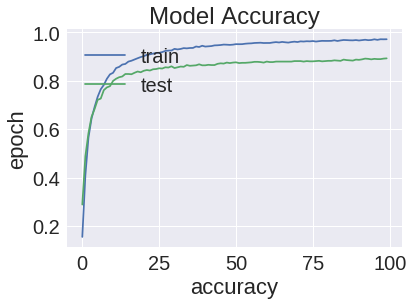

In [28]:
import time


layers = [ Dense(512, input_shape=(28*28, ), kernel_initializer='he_normal'),
          Activation('sigmoid'),
          BatchNormalization(),
          Dense(512, kernel_initializer='he_normal'),
          Activation('sigmoid'),
          #Dropout(0.5),
          Dense(10, kernel_initializer='he_normal'),
          Activation('softmax') ]
start = time.time()

model,history = experiments(x_train,y_train_cat,x_val,y_val_cat,layers,100,256,keras.optimizers.Adam())

done = time.time()
elapsed = done - start
print(elapsed)
print(history.history['val_acc'][-1])
plot('Model Accuracy','accuracy','epoch',history.history['acc'],history.history['val_acc'])
#plot('Model Loss','loss','epoch',history.history['loss'],history.history['val_loss'])

[2 5 5 ... 3 4 8]
[2 1 5 ... 3 4 8]
0.9452307692307692


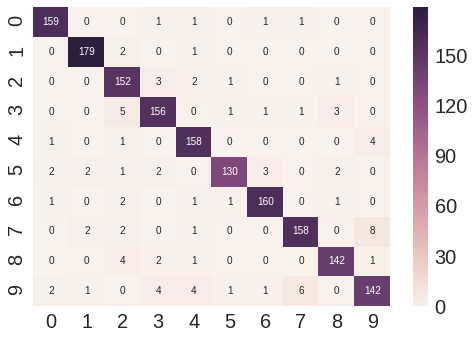

In [17]:
#!pip install pandas
prediction = model.predict(x_test)
y_pred = np.array(prediction).argmax(axis=-1)
print(y_test)
print(y_pred)
cnf_mat = confusion_matrix(y_test, y_pred)
cnf_row, cnf_col = cnf_mat.shape
print(accuracy_score(y_test,y_pred))
df_cm = pd.DataFrame(cnf_mat, range(cnf_row),
                  range(cnf_col))
sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g')
recall = recall_score(y_test,y_pred,average='weighted')
precision = precision_score(y_test,y_pred,average='weighted')
F1_score = 2 * (precision * recall) / (precision + recall)


----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
image_file_name = r'images.npy'
label_file_name = r'labels.npy'
image_data = np.load(image_file_name)
label_data = np.load(label_file_name)

In [0]:
model.save('my_model.h5')
files.download('my_model.h5')

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model.png',show_shapes=True)
files.download('model.png')

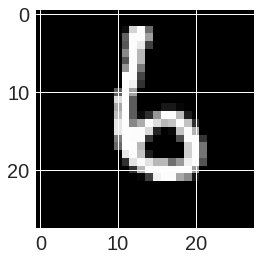

6


In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
image_data_pre = image_data.reshape(6500,784)
index = 0
for image in image_data_pre:
    index += 1
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.show()
    if index == 1:
        break
index = 0
for label in label_data:
    index += 1
    print(label)
    if index == 1:
        break

In [62]:
x_train2, x_test, y_train2, y_test = train_test_split(image_data_pre, label_data,
                                                    test_size=0.25,
                                                    random_state=0,
                                                    stratify=label_data)
x_train, x_val, y_train, y_val = train_test_split(x_train2, y_train2,
                                                    test_size=0.20,
                                                    random_state=0,
                                                    stratify=y_train2)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train)
print(keras.utils.to_categorical(y_train))

(3900, 784)
(975, 784)
(1625, 784)
[9 6 2 ... 0 3 0]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [0]:
y_train_cat = keras.utils.to_categorical(y_train)
y_val_cat = keras.utils.to_categorical(y_val)
y_test_cat = keras.utils.to_categorical(y_test)

In [0]:
model = Sequential() # declare model
model.add(Dense(10, input_shape=(28*28, ), kernel_initializer=keras.initializers.he_normal(seed=69))) # first layer
model.add(Activation('tanh'))

In [0]:
model.add(Dense(10, kernel_initializer='he_normal')) # last layer
model.add(Activation('softmax'))

# Compile Model

In [0]:
def recall(y_true, y_pred):
    true_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + keras.backend.epsilon())
    return recall
  
def precision(y_true, y_pred):
    true_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + keras.backend.epsilon())
    return precision

In [0]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy',recall, precision])

# Train Model

In [76]:
history = model.fit(x_train, y_train_cat, 
                    validation_data = (x_val, y_val_cat), 
                    epochs=10,
                    batch_size=200,
                    verbose=1)

Train on 3900 samples, validate on 975 samples
Epoch 1/10
3900/3900 [==============================] - 0s 16us/step - loss: 1.1676 - acc: 0.6621 - recall: 0.3131 - precision: 0.9456 - val_loss: 1.1748 - val_acc: 0.6595 - val_recall: 0.3149 - val_precision: 0.9303
Epoch 2/10
3900/3900 [==============================] - 0s 16us/step - loss: 1.1433 - acc: 0.6585 - recall: 0.3259 - precision: 0.9491 - val_loss: 1.2995 - val_acc: 0.5897 - val_recall: 0.2205 - val_precision: 0.9397
Epoch 3/10
3900/3900 [==============================] - 0s 16us/step - loss: 1.2366 - acc: 0.6174 - recall: 0.2479 - precision: 0.9318 - val_loss: 1.2322 - val_acc: 0.6164 - val_recall: 0.2564 - val_precision: 0.9007
Epoch 4/10
3900/3900 [==============================] - 0s 16us/step - loss: 1.1464 - acc: 0.6515 - recall: 0.3149 - precision: 0.9415 - val_loss: 1.1484 - val_acc: 0.6718 - val_recall: 0.3221 - val_precision: 0.9329
Epoch 5/10
3900/3900 [==============================] - 0s 16us/step - loss: 1.1283 -

dict_keys(['val_loss', 'val_acc', 'val_recall', 'val_precision', 'loss', 'acc', 'recall', 'precision'])


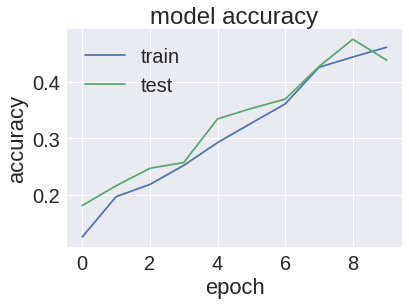

In [70]:
#import pydot
#import graphviz
from keras.utils import plot_model
#plot_model(model, to_file='model.png')
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

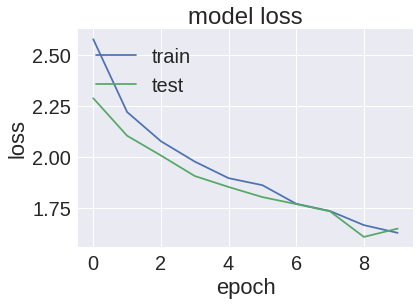

In [71]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Report Results

In [72]:
print(history.history)
prediction = model.predict(x_test)
print(prediction.shape,x_test.shape)
y_pred = np.array(prediction).argmax(axis=-1)
y_pred

{'val_loss': [2.287051634910779, 2.103883217542599, 2.0073233323219495, 1.9070702668948052, 1.8534430326559606, 1.8041021732183604, 1.7697233328452477, 1.7343271389985695, 1.6094137919254792, 1.6500221307461078], 'val_acc': [0.1815384634030171, 0.21641025634912345, 0.24717948452020302, 0.2574358949294457, 0.33435897338084686, 0.3528205133401431, 0.3692307770252228, 0.42666666477154463, 0.47487179667521745, 0.4379487251624083], 'val_recall': [0.005128205025520844, 0.0020512820173723577, 0.0061538460162969735, 0.0, 0.0010256410027161622, 0.0020512820054323245, 0.0, 0.0, 0.0, 0.0153846150646225], 'val_precision': [0.31623931802236116, 0.19230769230769232, 0.35042732801192844, 0.0, 0.20512818067501754, 0.20512820512820512, 0.0, 0.0, 0.0, 0.9999999755468124], 'loss': [2.5753998389610877, 2.219641373707698, 2.0769951465802317, 1.9775421313750439, 1.8965418888972356, 1.8622782566608527, 1.7713977556962233, 1.7359512524727063, 1.6671566382432594, 1.629300682972639], 'acc': [0.12615384696385798

array([3, 7, 6, ..., 4, 7, 2])

[3 8 6 ... 5 9 2]
[3 8 6 ... 5 9 2]
0.7235850302295115


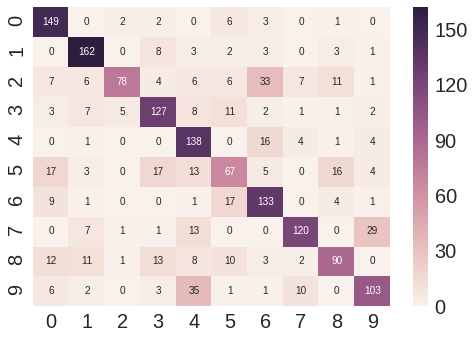

In [58]:
#!pip install pandas
print(y_test)
print(y_pred)
cnf_mat = confusion_matrix(y_test, y_pred)
cnf_row, cnf_col = cnf_mat.shape
accuracy_score(y_test,y_pred)
df_cm = pd.DataFrame(cnf_mat, range(cnf_row),
                  range(cnf_col))
sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g')
recall = recall_score(y_test,y_pred,average='weighted')
precision = precision_score(y_test,y_pred,average='weighted')
F1_score = 2 * (precision * recall) / (precision + recall)
print(F1_score)
